# 3 Klassifikation des Objekttyps (1/4)
Ziel dieser Aufgabe ist es, ein Modell zu erstellen, welches durch beliebige Metriken eine akkurate Vorhersage über den Typ der Immobilie erstellt.

Hier versuchen wir mithilfe eines KNeighborsClassifier ein gutes Modell zu erstellen. 

## Importieren der benötigten Libraries und Daten

- Für das Einlesen der Daten und die Verarbeitung dieser, nutzen wir Pandas. 
- Für die Visualisierung der Accuracy nutzen wir Numpy und Matplotlib.
- Für die Berechnung des Modells und die Trennung von Training- und Validierungsdaten nutzen wir sklearn.
- TQDM Nutzen wir als Progressbar.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from tqdm.notebook import tqdm
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split

Die Daten beziehen wir aus unserem Data Repository auf GitHub.

In [2]:
data = pd.read_csv("https://raw.githubusercontent.com/Immobilienrechner-Challenge/data/main/clean.csv")
data = data[['price', 'zip_code', 'living_space', 'rooms', 'type']].copy()

## Datenverarbeitung

Hier erschaffen wir uns einen kleinen Überblick über unsere Daten.

In [3]:
data["type"].unique()

array(['penthouse', 'terrace-house', 'detached-house', 'flat',
       'stepped-house', 'farmhouse', 'semi-detached-house',
       'stepped-apartment', 'duplex-maisonette', 'attic-flat', 'loft',
       'chalet', 'villa', 'attic-room', 'secondary-suite', 'castle',
       'detached-secondary-suite', 'studio',
       'furnished-residential-property', 'rustico', 'single-room'],
      dtype=object)

In [4]:
print(len(data))
data

13067


,price,zip_code,living_space,rooms,type
0,1150000.0,5023.0,100.0,3.5,penthouse
1,1420000.0,5023.0,156.0,4.5,terrace-house
2,720000.0,5022.0,93.0,2.5,penthouse
3,1430000.0,5023.0,154.0,4.5,detached-house
4,995000.0,5022.0,142.0,4.5,flat
...,...,...,...,...,...
13062,1101000.0,8610.0,70.0,2.5,flat
13063,1750000.0,8604.0,NaN,8.0,semi-detached-house
13064,1415000.0,8472.0,150.0,6.5,terrace-house
13065,1465000.0,8483.0,145.0,6.0,detached-house


Hier analysieren wir, wieviel NA Werte unser Datensatz hat.

In [5]:
data.isna().sum().sort_values(ascending = False)

living_space    1054
price           1015
rooms            567
zip_code          17
type               0
dtype: int64

Da unser Datensatz nur wenig NAs hat, verwerfen wir diese Observationen. Uns bleiben noch um die 11000 Datensätze.

In [6]:
data = data.dropna()
len(data)

10922

Unsere Daten spalten wir danach in Features und Zielvariablen.

In [7]:
y_cols = ["type"]
X_cols = list(set(data.columns) - set(y_cols))

X = data[X_cols].values
y = data[y_cols].values.ravel()

Unsere Daten unterteilen wir danach auf Trainings- und Validierungsdaten.

In [8]:
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.3)

# Modell erstellen und trainieren

Hier trainieren wir mehrere Modelle, welche wir anhand verschiedener Anzahl Neighbors erstellen. Für jedes Modell berechnen wir die Accuracy und speichern diese ab.

In [9]:
scores = np.array([(i, KNeighborsClassifier(i).fit(X_train, y_train).score(X_val, y_val)) for i in tqdm(range(1, 32))])

  0%|          | 0/31 [00:00<?, ?it/s]

Um zu entscheiden, wieviel Neighbors man für das Modell nehmen soll, visualisieren wir hier die Accuracy für jeden Wert.

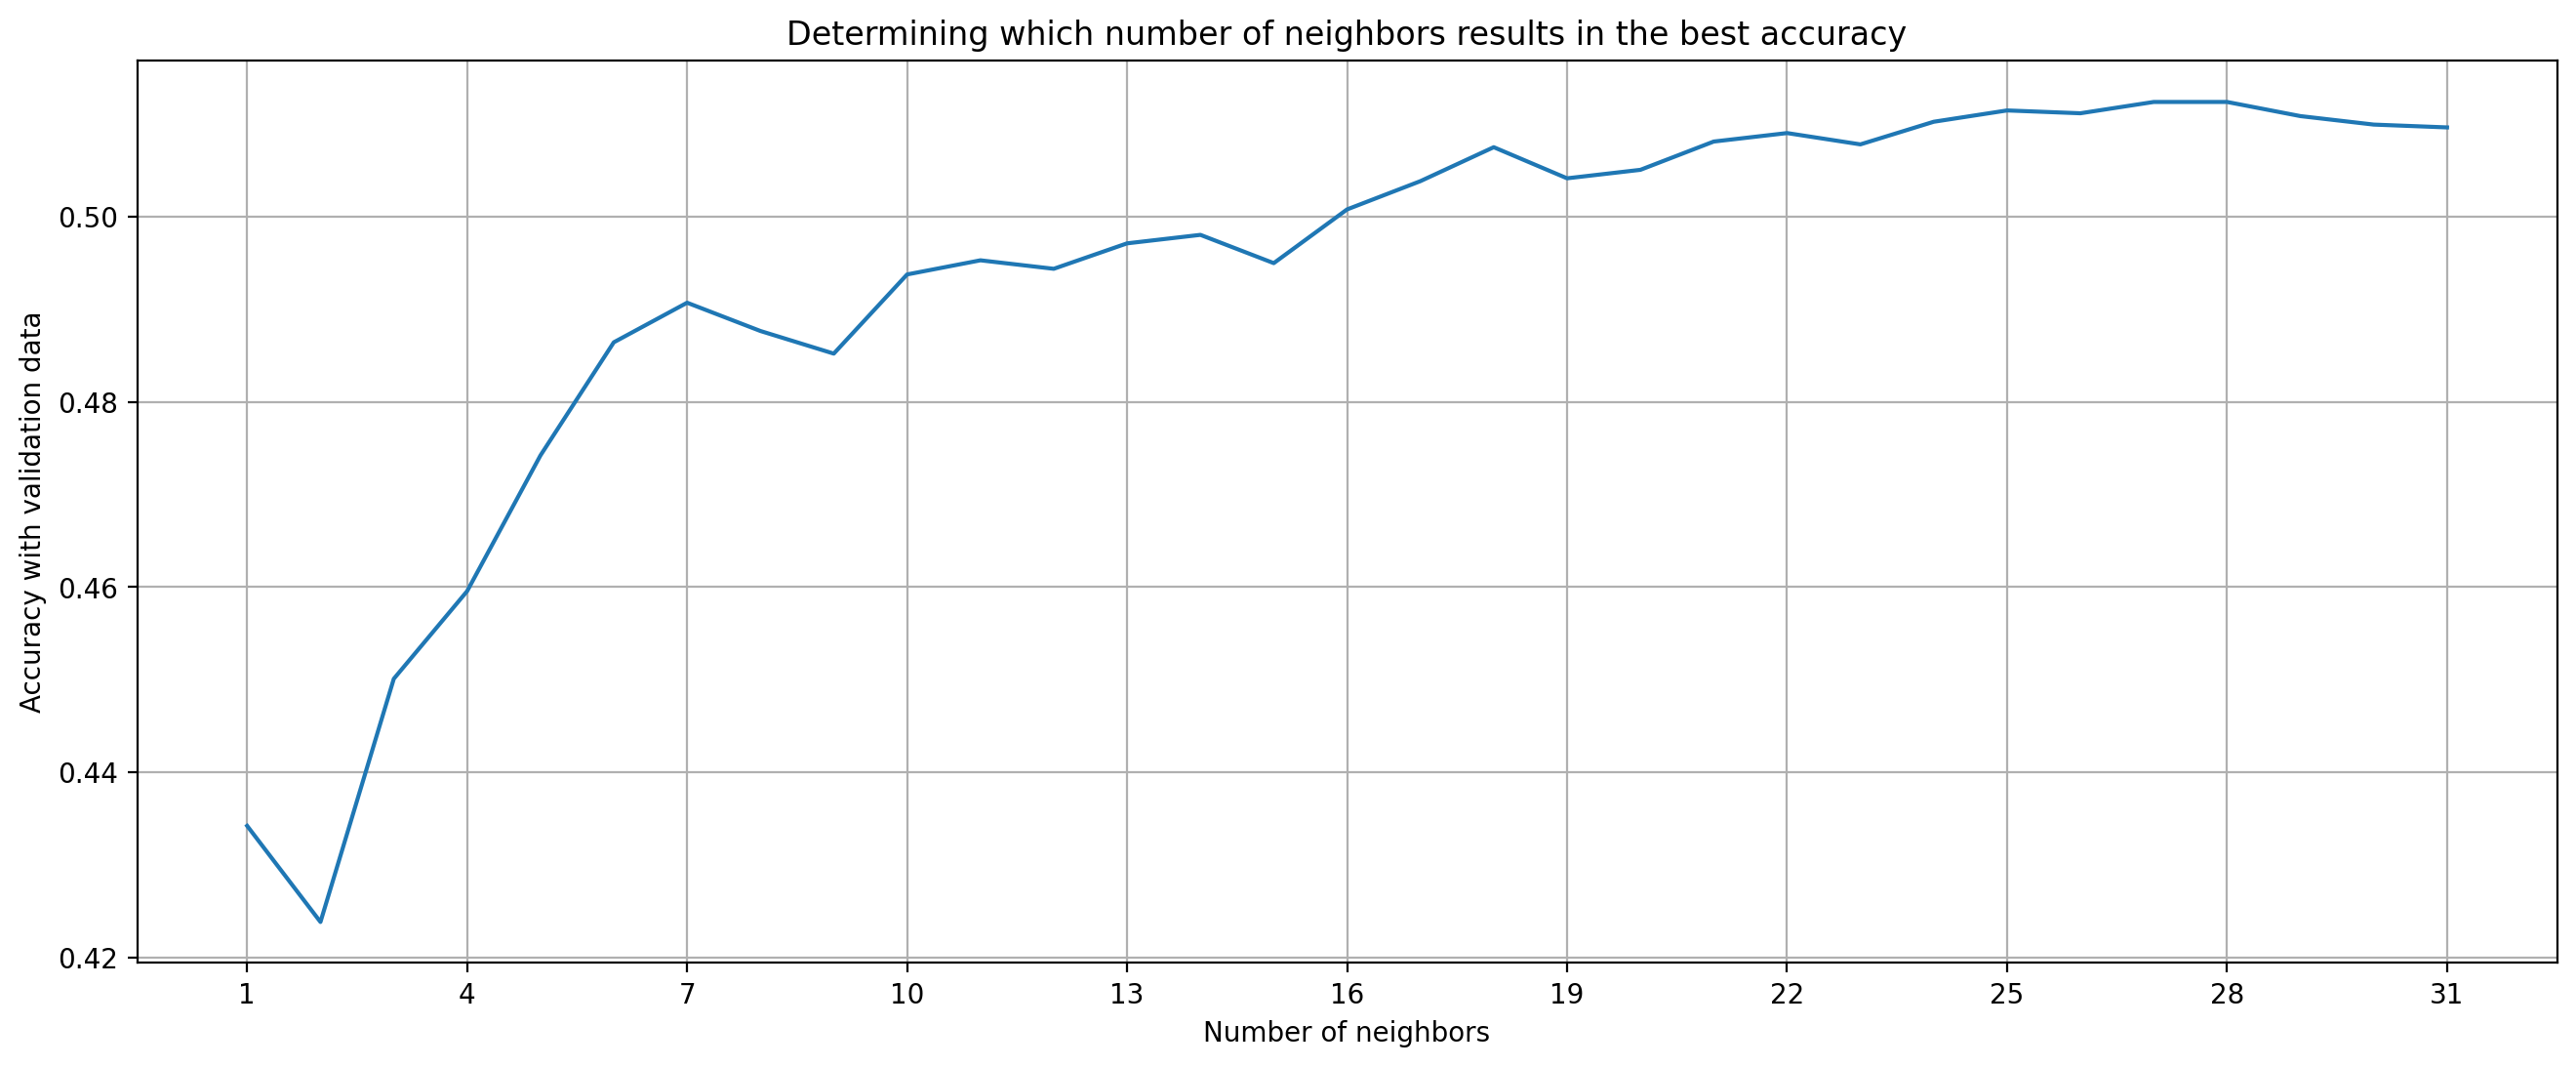

In [10]:
plt.figure(figsize=(16, 6), dpi=200)
plt.title("Determining which number of neighbors results in the best accuracy")
plt.xlabel("Number of neighbors")
plt.ylabel("Accuracy with validation data")
plt.plot(scores[:,0], scores[:,1])
plt.xticks(np.linspace(1, 31, 11))
plt.grid()
plt.show()

Aus diesem Plot kann man sehen, welches Modell die höchste Accuracy hat. Wir nehmen für dieses Beispiel 18 Neighbors, da wir damit eine Accuracy von über 50% erhalten. Danach erstellen wir einige Vorhersagen und vergleichen diese mit den tatsächlichen Werten.

In [11]:
model = KNeighborsClassifier(18).fit(X_train, y_train)

print("actual: ", y_val[:5])
print("predicted: ", model.predict(X_val[:5]))

actual:  ['detached-house' 'flat' 'detached-house' 'flat' 'flat']
predicted:  ['detached-house' 'flat' 'flat' 'flat' 'detached-house']
